In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.ndimage import uniform_filter1d
from scipy import stats
from matplotlib.pyplot import figure
import statistics

In [15]:
import os
os.getcwd()
os.chdir('C:\\Users\\vaorc\\Documents\\MSC COGNITIVE SCIENCE\\THESIS_FINAL_V2\\THESIS')
os.getcwd()

'C:\\Users\\vaorc\\Documents\\MSC COGNITIVE SCIENCE\\THESIS_FINAL_V2\\THESIS'

In [16]:
no_ff = {}
ff = {}
num_simulations = 50

#Fill dataframes with the results from 50 simulations on both single and multiple drive conditions
for i in range(num_simulations):
    csv_filename = 'Results/NoFF/noff_test'+str(i+1) +'.csv' 
    no_ff["data{0}".format(i)] = pd.read_csv(csv_filename)
    csv_filename = 'Results/FF/doubleFF'+str(i+1) +'.csv'
    ff["data{0}".format(i)] = pd.read_csv(csv_filename)

In [17]:
simulations= len(no_ff)
timesteps= no_ff['data0'].shape[0]

In [18]:
print('Number of simulations = ' + str(simulations))
print('Number of columns = ' + str(no_ff['data0'].shape[1]))
print('Number of timesteps = ' + str(timesteps))
print('Column names = ' + str(no_ff['data0'].columns))

Number of simulations = 50
Number of columns = 11
Number of timesteps = 90000
Column names = Index(['Xposition', 'Yposition', 'aVtemperature', 'aVthirst', 'DriveTemp',
       'DriveThirst', 'TFtemperature', 'TFthirst', 'Temperature_error',
       'Thirst_error', 'Grad_Temp'],
      dtype='object')


## RESULTS FROM MULTIPLE DRIVE PREDICTION 

The following are the results from comparison of two models of regulation. The homeostatic one, a reactive model that regulates needs such as thirst and temperature, and the allostatic one, which has two feedforward controllers added over the previously described model, one feedforward per need. The results encompass the average of 50 simulations per condition with 90.000 timesteps per simulation.

### BEHAVIOR OF THE DECISION MAKING LAYER - ATTRACTORS

The following results represent the behavior of the attractors when adding a feedforward for each condition (thirst and temperature). They reflect the competition happening between needs and affect the direction of the agent. In other words, they determine if whether the agent satiates thirst or internal temperature.

In [19]:
#Return average value of 50 simulations from a selected column and its average standard deviation
def mean_values(dataframe,column_name):
    values = []
    for i in range(simulations):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name][column_name]
        values.append(data)
    values = np.array(values)
    average_values = np.mean(values, axis=0)
    std_values = np.std(values, axis= 0)
    print(len(average_values))
    
    return average_values,std_values

In [41]:
#Average value of external temperature
noffmean_externaltemp , noffstd_externaltemp = mean_values(no_ff, 'Grad_Temp')

#Desired value of internal temperature
desired_value = np.full((90000,1),1)


90000


In [42]:
def attractor_behavior(dataframe):
    plt.figure(figsize=(10,10))
    plt.suptitle("BEHAVIOR OF DECISION MAKING LAYER IN 3 DIFFERENT SIMULATIONS", fontsize=20)
    for i in range(3):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name]
        thirst = data["TFthirst"]
        temp = data["TFtemperature"]
        plt.subplot(3, 1, i+1)
        plt.plot(temp, linewidth = 1, color = 'gray', alpha = 0.5, label ="Temperature attractor")
        plt.plot(thirst, linewidth = 1, color ="mediumpurple", label ="Thirst attractor")
        plt.plot(noffmean_externaltemp,linestyle ="dotted", color = 'black')
        plt.xlim(35000,50000)
        plt.legend(frameon= True, loc = 'upper left')
    plt.tight_layout()

Since the behavior of the decision making layer reflects high competition between thirst and temperature the visualization all the 90000 timesteps reflects an unclear pattern. <br>To clearly portray the competitive behavior between thirst and temperature the timesteps between 35000 and 50000 were chosen. However, the behavior shown below is similar regardless of the timesteps chosen and it can be seen across the simulations.

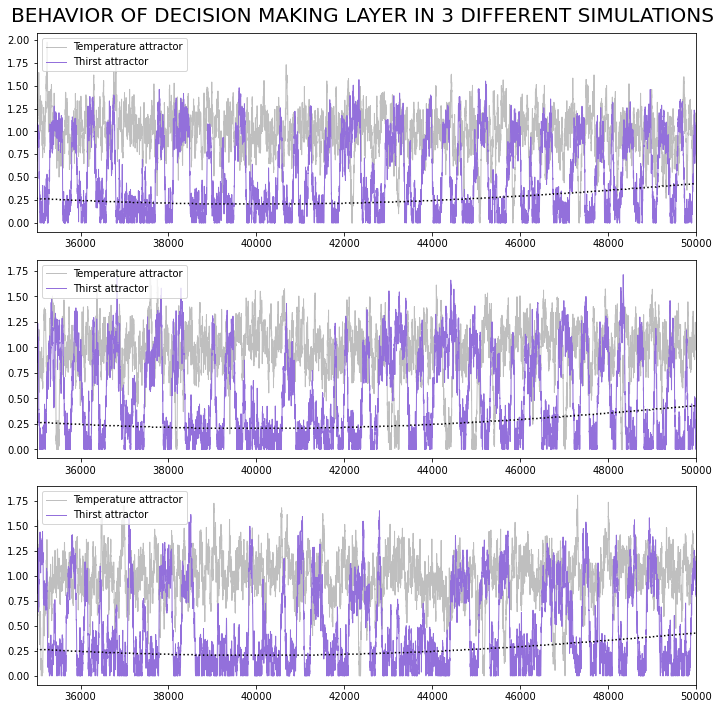

In [43]:
attractor_behavior(ff)

The above graphs reflect a predominance of thirst(purple) over internal temperature(gray), which is then found in the bias of the agent towards staying at a place of the grid that mostly satisfies thirst.

### THIRST & TEMPERATURE BEHAVIOR ACROSS THE SIMULATION <br>
The graphic below represents the behavior of thirst and temperature with and without the added feedforward controllers. The feedforward condition shown in purple compared to the non-feedforward condition displayed in gray. 
<br>The desired value for each drive is represented by a dotted black line at constant one, while the external temperature is represented by a dotted line with sinusoidal shape.

In [21]:
#Average values for thirst and temperature when no feedforward was added
noffmean_thirst, noffstd_thirst = mean_values(no_ff,'aVthirst')
noffmean_temperature, noffstd_temperature =  mean_values(no_ff,'aVtemperature')

90000
90000


In [37]:
#Average values for thirst and temperature when two feedforwards were added
ffmean_temperature, ffstd_temperature =  mean_values(ff,'aVtemperature')
ffmean_thirst, ffstd_thirst =  mean_values(ff,'aVthirst')

90000
90000


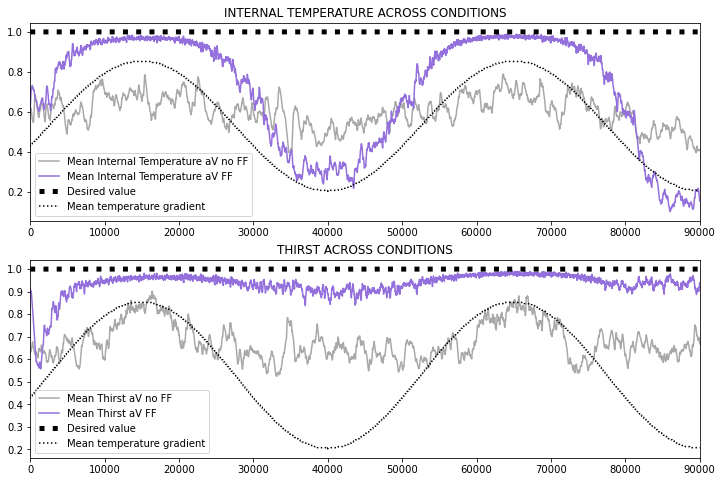

In [51]:
fig,ax = plt.subplots(nrows= 2, ncols= 1, figsize=(12,8))

ax[0].plot(noffmean_temperature, label='Mean Internal Temperature aV no FF', color="darkgray")
ax[0].plot(ffmean_temperature, label='Mean Internal Temperature aV FF', color="mediumpurple")
ax[0].plot(desired_value,label = 'Desired value', linewidth = 5, color="black", linestyle = "dotted")
ax[0].plot(noffmean_externaltemp,label='Mean temperature gradient', color="black",linestyle = "dotted")
ax[0].set_xlim(0,90000)
ax[0].set_title("INTERNAL TEMPERATURE ACROSS CONDITIONS")
ax[0].legend(frameon= True, loc = 'lower left')


ax[1].plot(noffmean_thirst,label = 'Mean Thirst aV no FF', color="darkgray")
ax[1].plot(ffmean_thirst, label='Mean Thirst aV FF ', color="mediumpurple")
ax[1].plot(desired_value,label = 'Desired value', linewidth = 5, color="black",linestyle = "dotted")
ax[1].plot(noffmean_externaltemp,label='Mean temperature gradient', color="black",linestyle = "dotted")
ax[1].set_xlim(0,90000)
ax[1].set_title("THIRST ACROSS CONDITIONS")
ax[1].legend(frameon= True, loc = 'lower left')


plt.show()


The previous graph shows that an agent under the feedforward contidion has a higher tendency towards the desired value, more sensibility to external temperature and a bias towards constantly satiating thirst.
It can be clearly seen how thirst has a higher rate of satiation in the feedforward condition compared to the non-feedforward one and internal temperature has greater satiation, as well as greater decreases when under the feedforward condition.

### ERROR FOR THIRST AND TEMPERATURE ACROSS THE SIMULATION <br>
 Graphs below represent the average error (1-actual_value) of thirst and temperature across the simulation when under the feedforward condition, compared to the non-feedforward condition.

In [45]:
#Average values of error(1-actual_value) for temperature without the feedforward controller.
noffmean_errortemp, noffstd_errortemp = mean_values(no_ff,'Temperature_error')

#Average values of error(1-actual_value) for temperature with the feedforward controller.
ffmean_errortemp, ffstd_errortemp = mean_values(ff, 'Temperature_error')

#Average values of error(1-actual_value) for thirst without the feedforward controller.
noffmean_errorthirst, noffstd_errorthirst = mean_values(no_ff,'Thirst_error')

#Average values of error(1-actual_value) for thirst with the feedforward controller.
ffmean_errorthirst, ffstd_errorthirst = mean_values(ff, 'Thirst_error')


90000
90000
90000
90000


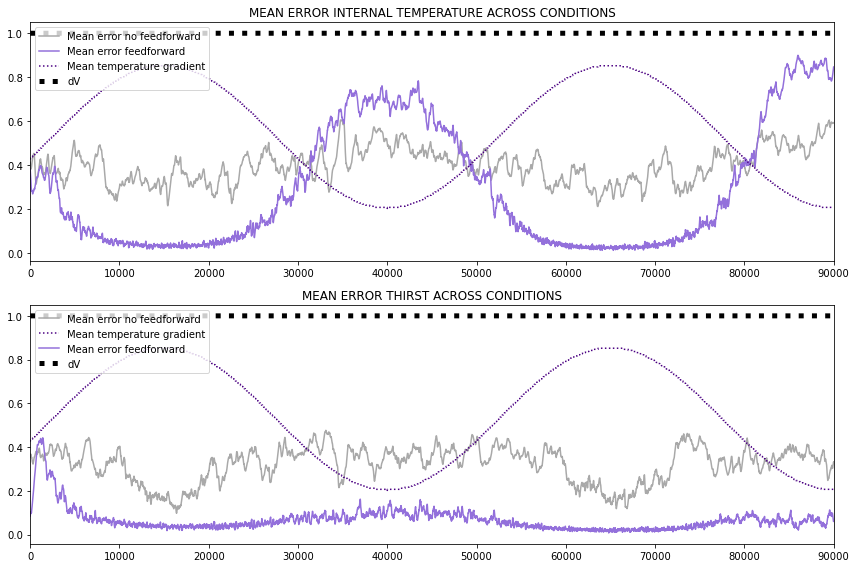

In [50]:
fig, ax = plt.subplots(nrows= 2, ncols= 1,figsize=(12,8))
ax[0].plot(noffmean_errortemp, label='Mean error no feedforward', color="darkgray")
ax[0].plot(ffmean_errortemp,label='Mean error feedforward', color="mediumpurple")
ax[0].plot(noffmean_externaltemp,label='Mean temperature gradient', color="indigo",linestyle = "dotted")
ax[0].plot(desired_value, label ='dV',linewidth =5,  color = 'black',linestyle = "dotted")
ax[0].set_title('MEAN ERROR INTERNAL TEMPERATURE ACROSS CONDITIONS')
ax[0].set_xlim(0,90000)
ax[0].legend(frameon= True, loc = 'upper left')

ax[1].plot(noffmean_errorthirst, label='Mean error no feedforward', color="darkgray")
ax[1].plot(noffmean_externaltemp,label='Mean temperature gradient', color="indigo",linestyle = "dotted")
ax[1].plot(ffmean_errorthirst,label='Mean error feedforward', color="mediumpurple")
ax[1].plot(desired_value, label ='dV',linewidth =5,  color = 'black',linestyle = "dotted")
ax[1].set_title('MEAN ERROR THIRST ACROSS CONDITIONS')
ax[1].legend(frameon= True, loc = 'upper left')
ax[1].set_xlim(0,90000)
plt.tight_layout()

In [44]:
totalerrortemp_noff = np.mean(noffmean_errortemp)
totalerrortemp_ff = np.mean(ffmean_errortemp)
print(f'Mean value of internal temp error in no ff condition was: {totalerrortemp_noff} vs the ff condition, which was {totalerrortemp_ff}')

max_errortemp_noff = noffmean_errortemp.max()
max_errortemp_ff = ffmean_errortemp.max()
print(f'Max value of internal temp error in no ff condition was: {max_errortemp_noff} vs the ff condition, which was {max_errortemp_ff}')

total_std_error_noff = np.std(noffmean_errortemp)
total_std_error_ff =np.std(ffmean_errortemp)
print(f'Standard deviation value of temperature error in no ff condition was: {total_std_error_noff} vs the ff condition, which was {total_std_error_ff}')

Mean value of internal temp error in no ff condition was: 0.39685607222222236 vs the ff condition, which was 0.28751570688888894
Max value of internal temp error in no ff condition was: 0.6050000000000001 vs the ff condition, which was 0.8994800000000001
Standard deviation value of temperature error in no ff condition was: 0.07978578363308778 vs the ff condition, which was 0.2760612068093119


In [48]:
totalerrorthirst_noff = np.mean(noffmean_errorthirst)
totalerrorthirst_ff = np.mean(ffmean_errorthirst)
print(f'Mean value of thirst error in no ff condition was: {totalerrorthirst_noff} vs the ff condition, which was {totalerrorthirst_ff}')

max_errorthirst_noff = noffmean_errorthirst.max()
max_errorthirst_ff = ffmean_errorthirst.max()
print(f'Max value of thirst error in no ff condition was: {max_errorthirst_noff} vs the ff condition, which was {max_errorthirst_ff}')

total_std_errorthirst_noff = np.std(noffmean_errorthirst)
total_std_errorthirst_ff =np.std(ffmean_errorthirst)
print(f'Standard deviation value of thirst error in no ff condition was: {total_std_errorthirst_noff} vs the ff condition, which was {total_std_errorthirst_ff}')

Mean value of thirst error in no ff condition was: 0.32183118177777786 vs the ff condition, which was 0.06757517555555559
Max value of thirst error in no ff condition was: 0.47658000000000006 vs the ff condition, which was 0.4427000000000001
Standard deviation value of thirst error in no ff condition was: 0.08026031469362026 vs the ff condition, which was 0.05579431274980019


### AVERAGE ERROR ACROSS CONDITIONS


The following figures condense the average of homeostatic error for both conditions. It is noticeable how the homeostatic error is on an average lower with the feedforward controller. In effect, the average of mean error thirst in the non-feedforward condition was 0.32 while 0.067 for the feedforward. Similarly, but with less significant difference, the error in internal temperature under the non-feedforward condition was 0.3968 and 0.2875 for the feedforward one.

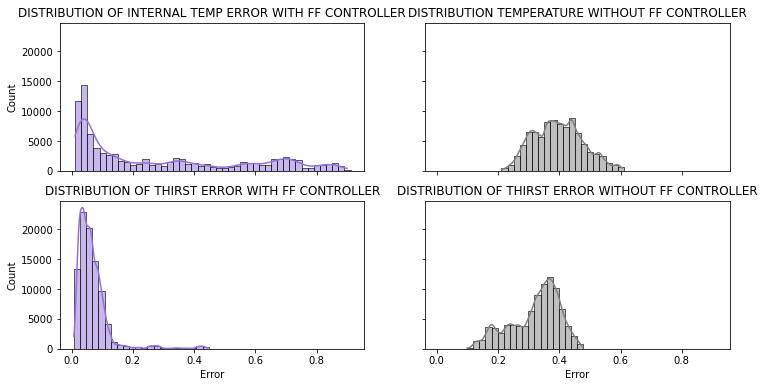

In [64]:
fig, axes = plt.subplots(nrows = 2, ncols= 2,figsize=(12, 6),sharey=True, sharex = True)
sns.histplot(ffmean_errortemp, bins = 50, binwidth= 0.02, kde= True, ax = axes[0][0], color ="mediumpurple" ).set(title='DISTRIBUTION OF INTERNAL TEMP ERROR WITH FF CONTROLLER')
sns.histplot(noffmean_errortemp, bins=50, binwidth= 0.02,kde= True, ax = axes[0][1],  color ="gray").set(title='DISTRIBUTION TEMPERATURE WITHOUT FF CONTROLLER')
sns.histplot(ffmean_errorthirst, bins =50, binwidth= 0.02,kde= True, ax = axes[1][0], color ="mediumpurple" ).set(title='DISTRIBUTION OF THIRST ERROR WITH FF CONTROLLER',xlabel="Error")
sns.histplot(noffmean_errorthirst, bins=50, binwidth= 0.02,kde= True, ax = axes[1][1], color ="gray").set(title='DISTRIBUTION OF THIRST ERROR WITHOUT FF CONTROLLER',xlabel="Error")
plt.show()

In [56]:
labels = ['noff','ff']
values = [totalerrorthirst_noff,totalerrorthirst_ff]
error = [total_std_errorthirst_noff,total_std_errorthirst_ff]

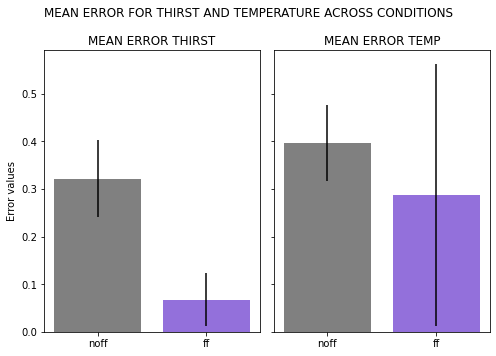

In [62]:
fig, ax = plt.subplots(nrows= 1, ncols= 2,figsize=(7,5),sharey=True)
fig.suptitle('MEAN ERROR FOR THIRST AND TEMPERATURE ACROSS CONDITIONS')

ax[0].bar(labels,values, yerr=error,color =['gray','mediumpurple'])
ax[0].set_title('MEAN ERROR THIRST')
ax[0].set_ylabel('Error values')



ax[1].bar(labels, [totalerrortemp_noff,totalerrortemp_ff],  yerr=[total_std_error_noff,total_std_error_ff], color =['gray','mediumpurple' ])
ax[1].set_title('MEAN ERROR TEMP')

plt.tight_layout()

Below, a graph condensing the results for efficiency, stability and fairness for both conditions. The results were taken by generating a selection of means over the 50 simulations on a window of 9000 timesteps. Further explanation on how these results were obtained is described in the written report.

In [66]:
def measurements(dataframe):
    mean_slot = 1000
    efficency = []
    fairness = []
    stability = []
    aVs_timestep = []
    dVs_timestep = []


    for i in range(int(timesteps/mean_slot)):
        SlotMeanTemp = []
        SlotMeanThirst = []
        for j in range(50):
            dict_name = 'data'+ str(j)
            SlotMeanTemp.append(statistics.mean(dataframe[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
            SlotMeanThirst.append(statistics.mean(dataframe[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
        efficency.append((statistics.mean(SlotMeanTemp)+statistics.mean(SlotMeanThirst))/2)

    for i in range(int(timesteps/mean_slot)):
        SlotMeanTemp = []
        SlotMeanThirst = []
        for j in range(simulations):
            dict_name = 'data'+ str(j)
            SlotMeanTemp.append(statistics.mean(dataframe[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
            SlotMeanThirst.append(statistics.mean(dataframe[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
        fairness.append(1-(abs(statistics.mean(SlotMeanTemp)-statistics.mean(SlotMeanThirst))))
        

    for i in range(len(dataframe[dict_name]['aVtemperature'])):
        current_timestep = []
        current_timestep.append(dataframe[dict_name]['aVtemperature'][i])
        current_timestep.append(dataframe[dict_name]['aVthirst'][i])
        aVs_timestep.append(current_timestep)
        dVs_timestep.append([1, 1])

        
    for i in range(int(timesteps/mean_slot)):
        stability.append(1-np.mean(np.array(dVs_timestep[mean_slot*i:mean_slot*(i+1)])-np.array(aVs_timestep[mean_slot*i:mean_slot*(i+1)])**2))
        
        
    return stability,fairness,efficency

In [68]:

stability_ff, fairnes_ff, efficency_ff = [np.mean(i) for i in measurements(ff)]
stability, fairnes, efficency = [np.mean(i) for i in measurements(no_ff)]

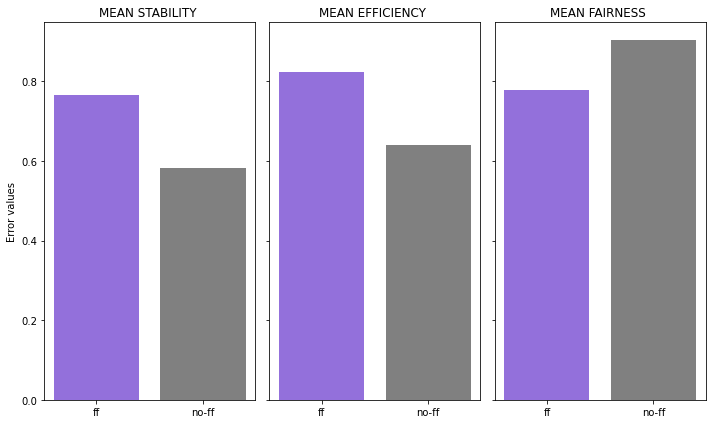

In [71]:
fig, ax = plt.subplots(nrows= 1, ncols= 3,figsize=(10,6),sharey=True)

ax[0].bar(['ff', 'no-ff'],[stability_ff,stability], color =['mediumpurple','gray'])
ax[0].set_title('MEAN STABILITY ')
ax[0].set_ylabel('Error values')



ax[1].bar(['ff', 'no-ff'], [efficency_ff,efficency],  color =['mediumpurple','gray'])
ax[1].set_title('MEAN EFFICIENCY ')


ax[2].bar(['ff', 'no-ff'], [fairnes_ff,fairnes],  color =['mediumpurple','gray' ])
ax[2].set_title('MEAN FAIRNESS ')

plt.tight_layout()

In [72]:
stability_ff, fairnes_ff, efficency_ff = measurements(ff)
stability,fairnes, efficency = measurements(no_ff)

### EFFICENCY

In [69]:
external_temp = []
for i in range(int(timesteps/1000)):
    SlotMeanTemp = []
    SlotMeanThirst = []
    for j in range(50):
        dict_name = 'data'+ str(j)
        SlotMeanTemp.append(statistics.mean(no_ff[dict_name]['Grad_Temp'][1000*i:1000*(i+1)]))
    external_temp.append(statistics.mean(SlotMeanTemp))

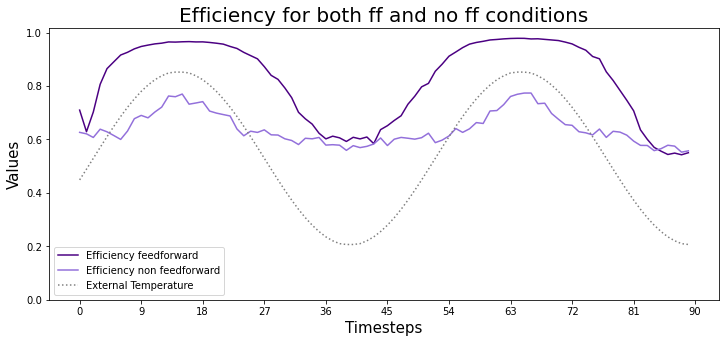

In [80]:
fig = plt.figure(figsize=(12, 5))
plt.plot(efficency_ff, label='Efficiency feedforward', color="indigo")
plt.plot(efficency, label='Efficiency non feedforward', color="mediumpurple")
plt.plot(external_temp, label='External Temperature', color="gray",linestyle = 'dotted')
plt.xticks(np.arange(0, timesteps/1000+1, step=timesteps/1000/10))
plt.ticklabel_format(axis="x", style="sci", useOffset=False)# scilimits=(0,0)
plt.title('Efficiency for both ff and no ff conditions', fontsize=20)
plt.ylabel('Values', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

Efficiency reflects how effective the agent was in satisfying the needs as they emerged across the simulations. The closer to one, the more efficient in regulating both thirst and temperature. In this case, the efficiency was higher under the feedforward condition (0.8224) compared to the non-feedforward one (0.6406), meaning that the agent was more efficient in the first condition since on average almost no disturbance for either drive (thirst or internal temperature) was experienced across the simulation.

### FAIRNESS

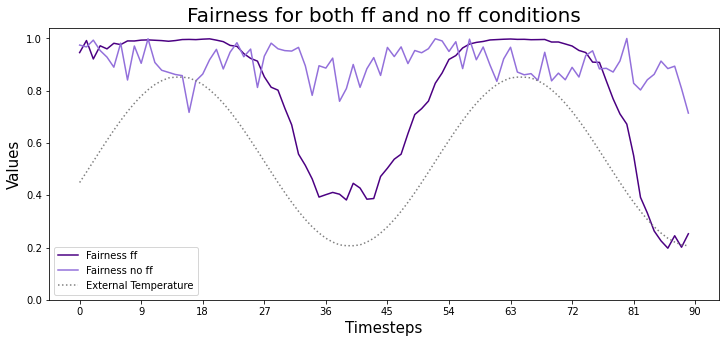

In [79]:
fig = plt.figure(figsize=(12, 5))
plt.plot(fairnes_ff, label='Fairness ff', color="indigo")
plt.plot(fairnes, label='Fairness no ff', color="mediumpurple")
plt.plot(external_temp, label='External Temperature', color="gray",linestyle = 'dotted')
plt.xticks(np.arange(0, timesteps/1000+1, step=timesteps/1000/10))
plt.ticklabel_format(axis="x", style="sci", useOffset=False)
plt.title('Fairness for both ff and no ff conditions', fontsize=20)
plt.ylabel('Values', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

In regards to how fair the satiation of each drive was, the feedforward controller condition had a lower fairness on an average (0.778) compared to the non-feedforward one (0.903), indicating biased conflict resolution in which thirst is prioritized.

### STABILITY

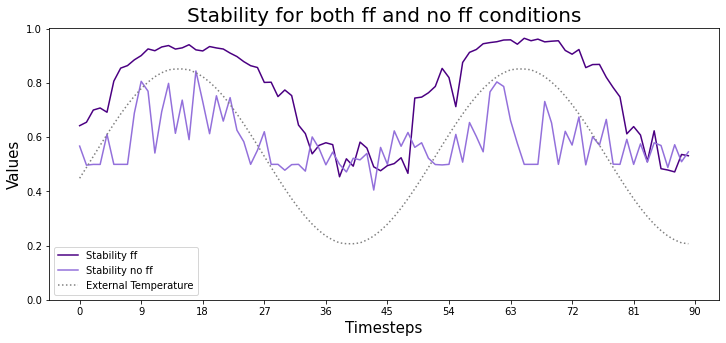

In [78]:
fig = plt.figure(figsize=(12, 5))
plt.plot(stability_ff, label='Stability ff', color="indigo")
plt.plot(stability, label='Stability no ff', color="mediumpurple")
plt.plot(external_temp, label='External Temperature', color="gray",linestyle = 'dotted')
plt.xticks(np.arange(0, timesteps/1000+1, step=timesteps/1000/10))
plt.ticklabel_format(axis="x", style="sci",useOffset=False)
plt.title('Stability for both ff and no ff conditions', fontsize=20)
plt.ylabel('Values', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

Stability reflects how well the agent maintained homeostatic regulation for both thirst and internal temperature across the simulation.It is a measurement that is sensitive to both fairness and efficiency as previously explained in the measured variables section.
When comparing conditions, the feedforward controller reflected higher stability (0.76) versus the non-feedforward condition (0.581). Showing that values for both thirst and temperature tended to oscillate more on an average under the non-feedforward condition than under the feedforward one.
Nevertheless, the graph reflects a significant decrease in stability once the temperature of the environment is reduced and therefore the agent has to make a decision on which need to attend.

## FF BEHAVIOR FOR BOTH CONDITIONS

In [34]:
mean_output_temp, std_output_temp = mean_values(ff,'Output')
mean_output_thirst, std_output_thirst = mean_values(ff,'Output_thirst')
fferror_mean_temp, error_std_temp= mean_values(ff,'Temperature_error')
fferror_mean_thirst, error_std_thirst = mean_values(ff,'Thirst_error')
nofferror_mean_temp, error_std_temp= mean_values(no_ff,'Temperature_error')
nofferror_mean_thirst, error_std_thirst = mean_values(no_ff,'Thirst_error')


90000
90000
90000
90000
90000
90000


In [126]:
def plot_outputff(mean_output_temp,mean_output_thirst,error_mean_temp,error_mean_thirst):
    fig, ax = plt.subplots(nrows= 4, ncols= 1,figsize=(12,6))
    ax[0].plot(mean_output_temp, label='Output ff controller temperature', linewidth=2, linestyle='--')
    ax[0].set_title('TEMPERATURE FEEDFORWARD BEHAVIOR')
    ax[0].set_ylabel('Values')
    ax[0].legend(frameon=False)
    ax[0].set_xlim(0,90000)
    
    ax[1].plot(error_mean_temp, label='Temperature error', linewidth=2, linestyle='--')
    ax[1].set_ylabel('Values')
    ax[1].set_title('TEMPERATURE ERROR')
    ax[1].set_xlim(0,90000)

    ax[2].plot(mean_output_thirst, label= 'Output ff controller thirst', linewidth=2, linestyle='--')
    ax[2].set_title('THIRST FEEDFORWARD BEHAVIOR')
    ax[2].set_ylabel('Values')
    ax[2].legend(frameon=False)
    ax[2].set_xlim(0,90000)

    ax[3].plot(error_mean_thirst, label='Thirst error', linewidth=2, linestyle='--')
    ax[3].set_title('THIRST ERROR')
    ax[3].set_ylabel('Values')
    ax[3].set_xlabel('Timesteps')
    ax[3].set_xlim(0,90000)


    plt.tight_layout()

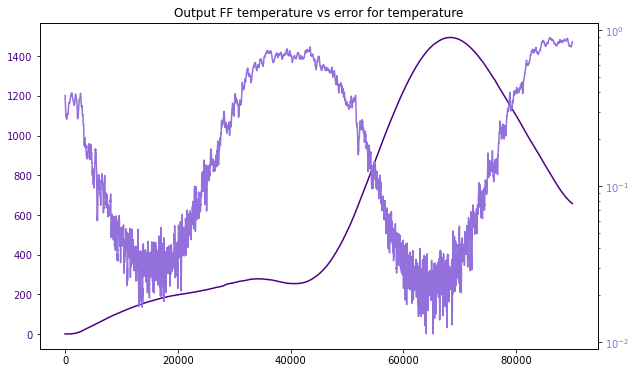

In [128]:
fig, ax = plt.subplots(figsize = (10,6))

# Plot linear sequence, and set tick labels to the same color
ax.plot(mean_output_temp, color='indigo')
ax.set_title('Output FF temperature vs error for temperature')
ax.plot
ax.tick_params(axis='y', labelcolor='indigo')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(fferror_mean_temp,color='mediumpurple')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='mediumpurple')
ax2.set_xlabel('Timesteps')

plt.show()

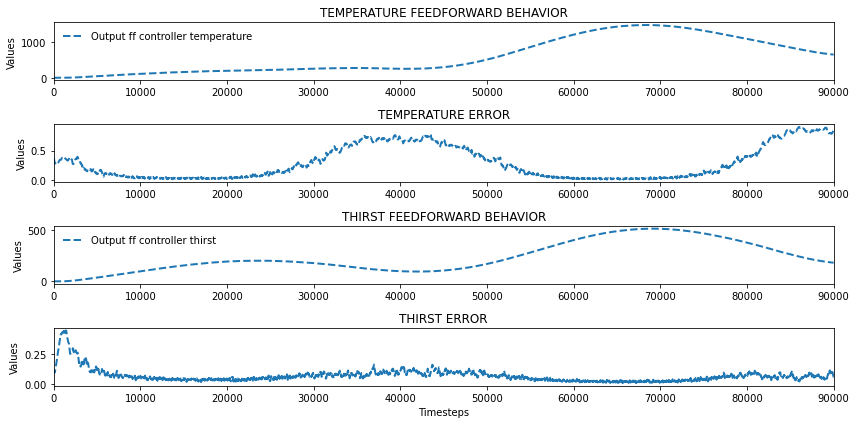

In [129]:
#output of both Thirst and temperature FF accompanied by the errors.
plot_outputff(mean_output_temp,mean_output_thirst,fferror_mean_temp,fferror_mean_thirst)

# LOCATION AND TRAJECTORY OF THE AGENT

In [110]:
Xpose_av, Xpose_std = mean_values(ff, 'Xposition')
Ypose, Ypose_std = mean_values(ff,'Yposition')

90000
90000


In [102]:
def map_plot_low(dataframe):
    plt.figure(figsize=(10,8))
    for i in range(6):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name]
        x = data.loc[30000:50000, 'Xposition']  #Location at low temperatures in the grid
        y = data.loc[30000:50000,'Yposition']
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
        heatmap = heatmap.T
        plt.subplot(2, 3, i+1)
        plt.suptitle('HEAT MAP OF AGENT ON 6 TESTS DURING LOW TEMPERATURES IN THE ENVIRONMENT')
        plt.imshow(heatmap, origin='lower', vmin = 0, vmax = 450, aspect= 'auto',interpolation='nearest',extent=[0,200,0,200])

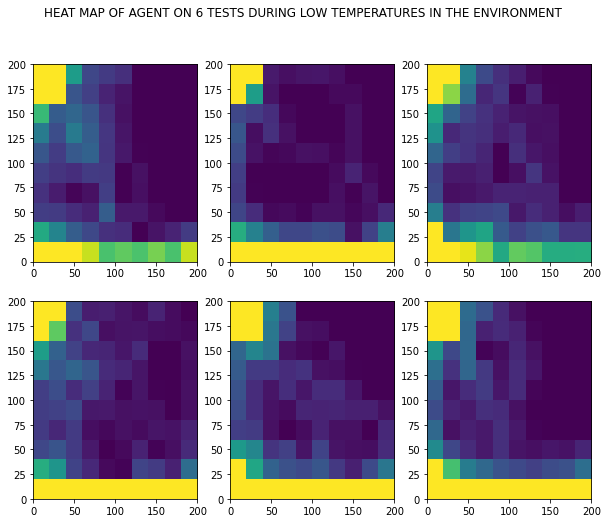

In [103]:
#Trajectory of the agent at low temperatures in 6 different simulations without the ff controller
map_plot_low(no_ff)

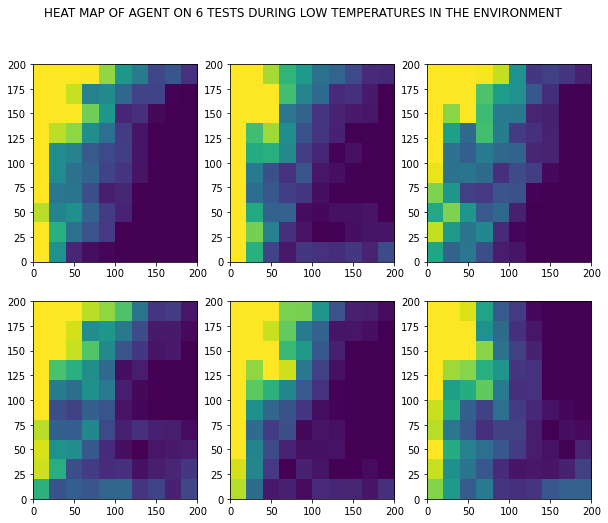

In [99]:
#Trajectory of the agent at low temperatures in 6 different simulations with the ff controller
map_plot_low(ff)

In [104]:
def map_plot_high(dataframe):
    plt.figure(figsize=(10,8))
    plt.title('Heat map of agent in 50 tests')
    for i in range(6):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name]
        x = data.loc[50000:75000, 'Xposition']  # Location at high temperatures in the grid
        y = data.loc[50000:75000,'Yposition']
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
        heatmap = heatmap.T
        plt.subplot(2, 3, i+1)
        plt.suptitle("HEAT MAP OF AGENT ON 6 TESTS DURING HIGH TEMPERATURES IN THE ENVIRONMENT")
        plt.imshow(heatmap, origin='lower', vmin = 0, vmax = 450,aspect= 'auto',interpolation='nearest',extent=[0,200,0,200])

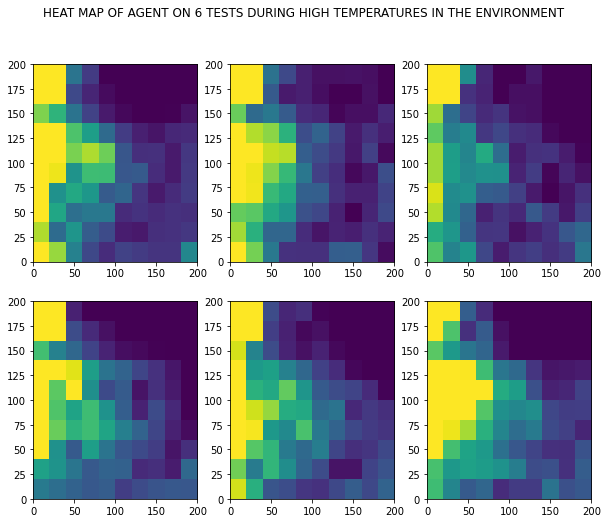

In [106]:
#Trajectory of the agent at high temperatures in 6 different simulations without the ff controller
map_plot_high(no_ff)

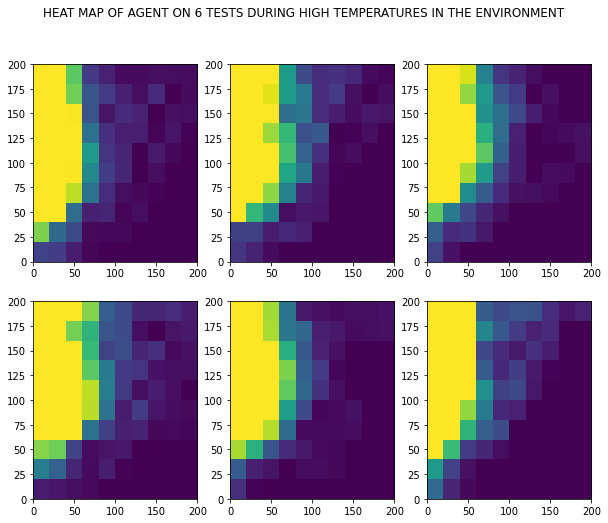

In [107]:
#Trajectory of the agent at low temperatures in 6 different simulations with the ff controller
map_plot_high(ff)

In [ ]:
def map_plot(dataframe):
    plt.figure(figsize=(10,8))
    plt.title('Heat map of agent in 50 tests')
    for i in range(6):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name]
        x = data.loc[20000:40000, 'Xposition']  # is a valid integer index and NAME is the name of the column.
        y = data.loc[20000:40000,'Yposition']
        #x = data['Xposition']#[(data['Grad_Temp']>0.4)]
        #y = data['Yposition']#[(data['Grad_Temp']>0.4)]
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
        heatmap = heatmap.T
        plt.subplot(2, 3, i+1)
        plt.imshow(heatmap, origin='lower', vmin = 0, vmax = 350,aspect= 'auto',interpolation='nearest', extent=[0,200,0,200])

In [113]:
def map_plot():
    plt.figure(figsize=(6,6))
    plt.title('Heat map of agent in 50 tests in 100.000 timesteps under the FFcondition')
    x = Xpose_av
    y = Ypose
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=(10,10))
    heatmap = heatmap.T
    plt.imshow(heatmap, origin='lower',vmin = 0, vmax = 3000, aspect= 'auto',interpolation='nearest',)

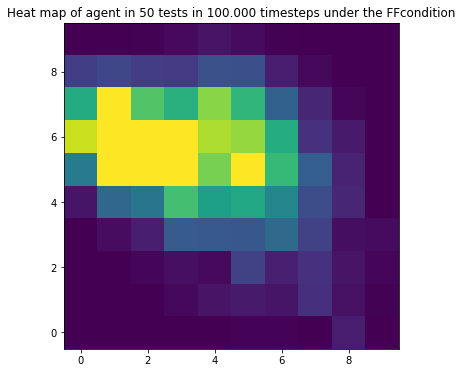

In [114]:
map_plot()

In [ ]:
def plot_trajectory(Xpose,Ypose):
    plt.figure(figsize=(8, 8))
    plt.plot(Xpose, Ypose, linewidth=0.3)
    plt.title('Agent trajectory', fontsize=20)
    plt.plot(Xpose[0],Ypose[0],'ro')
    plt.show()

In [ ]:
no_ffXpose_av, Xpose_std = mean_values(no_ff, 'Xposition')
no_ffYpose, Ypose_std = mean_values(no_ff,'Yposition')

90000
90000


In [115]:
def trajectory_plot(dataframe ):
    plt.figure(figsize=(10,10))
    plt.suptitle('Trajectory of agent in 4 tests feedforward condition', fontsize=20)
    for i in range(6):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name]
        dataX = data["Xposition"]
        dataY = data["Yposition"]
        plt.subplot(3, 2, i+1)
        plt.xlabel("X position")
        plt.ylabel("Y position")
        plt.plot(dataX,dataY, linewidth = 0.2)
    plt.tight_layout()
        

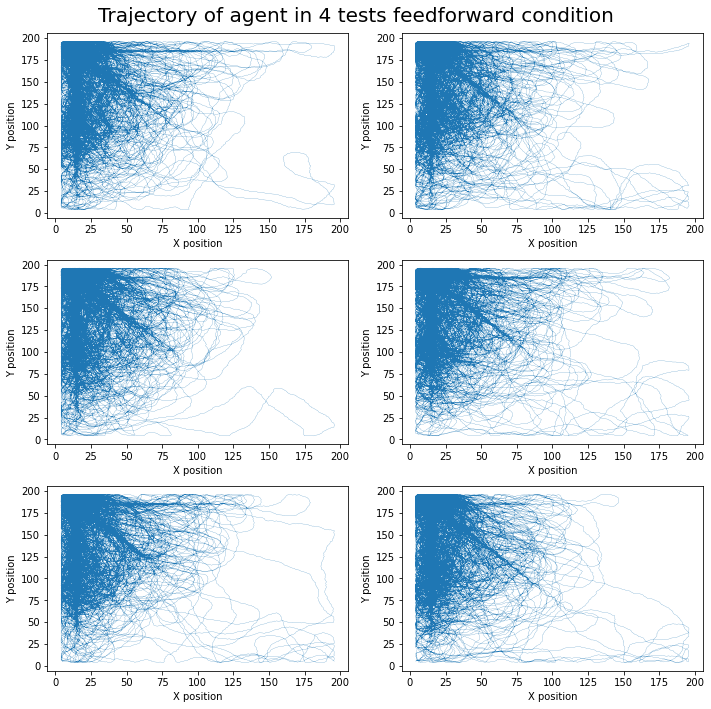

In [116]:
#Trajectory ff condition
trajectory_plot(ff)

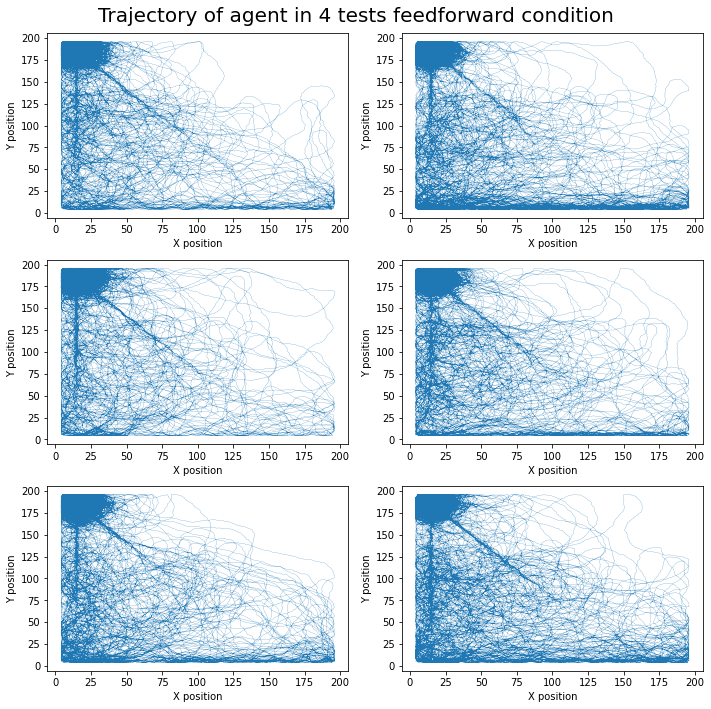

In [117]:
#Trajectory no ff condition
trajectory_plot(no_ff)

The graphs above show the trajectory of the agent, on the non-feedforward condition, the agent moves across the x and y axes equally when trying to solve the task, whereas for the image on the right, the agent seems to move mainly across the y axis surrounding two points, one being the source of thirst relief at the upper left corner and the other one being middle left side of the gradient, which corresponds to high temperatures.

In [118]:
def trajectory_temperature(dataframe):
    plt.figure(figsize=(10,10))
    plt.suptitle('TRAJECTORY OF AGENT IN 4 TESTS NON-FEEDFORWARD CONDITION', fontsize=20)
    for i in range(6):
        dict_name = 'data'+ str(i)
        data = dataframe[dict_name]
        ax = plt.subplot(3, 2, i+1)
        sns.lineplot(ax =ax, data = data, x = "Xposition",y= "Yposition", hue = "Grad_Temp", linewidth = 0.06, palette ="coolwarm" ,legend=False)
        
    plt.tight_layout()

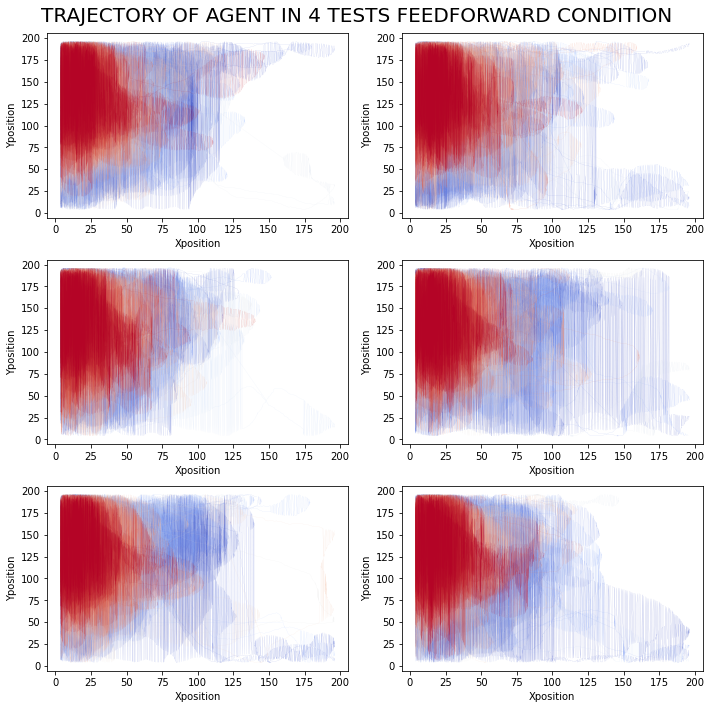

In [ ]:
trajectory_temperature(ff)

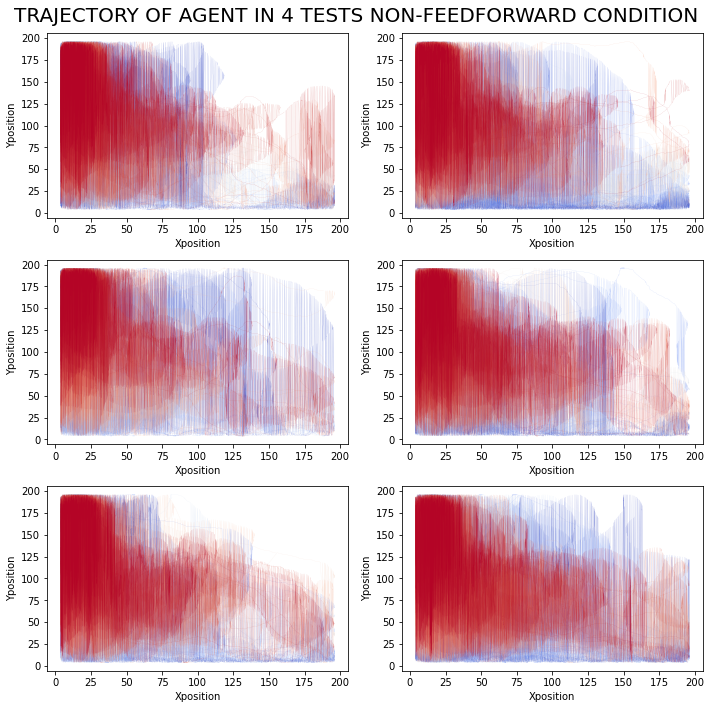

In [ ]:
trajectory_temperature(no_ff)


Here the trajectory of the agent is mapped to the temperature of the environment. Red indicates higher temperatures while blue indicates low ones. The trajectory for the non-feedforward condition is very similar regardless of temperature of the environment, while when in the feedforward
condition the behavior changes, the agent tends to stay in the y axis when the environment is warmer and roams more across the x axis when the external temperature decreases. For further explanation refer to the written report.